# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [2]:
census_list = []

for i in range(10):
    census = pd.read_csv(f'states{i}.csv')
    census_list.append(census)

for i in range(len(census_list)): print(census_list[i].shape)

(6, 11)
(6, 11)
(6, 11)
(6, 11)
(6, 11)
(6, 11)
(6, 11)
(6, 11)
(6, 11)
(6, 11)


In [3]:
census_list[0]

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F
5,5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F


2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [4]:
all_csv = glob.glob('state*.csv')
df_list = []
for i in all_csv:
    df = pd.read_csv(i)
    df_list.append(df)

us_census = pd.concat(df_list)

3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [5]:
print(list(us_census.columns))

['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Income', 'GenderPop']


In [6]:
us_census.columns = us_census.columns.str.lower()

In [7]:
us_census.dtypes

unnamed: 0     int64
state         object
totalpop       int64
hispanic      object
white         object
black         object
native        object
asian         object
pacific       object
income        object
genderpop     object
dtype: object

In [8]:
us_census.shape

(60, 11)

4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [9]:
us_census.head()

,unnamed: 0,state,totalpop,hispanic,white,black,native,asian,pacific,income,genderpop
0,0,Iowa,3093526,5.30%,87.72%,3.26%,0.29%,1.70%,0.06%,"$53,017.75",1534595M_1558931F
1,1,Kansas,2892987,11.64%,75.96%,6.57%,0.73%,2.33%,NaN,"$53,885.61",1439862M_1453125F
2,2,Kentucky,4397353,3.22%,85.23%,8.27%,0.17%,1.13%,0.05%,"$45,285.80",2164208M_2233145F
3,3,Louisiana,4625253,4.87%,54.98%,36.33%,0.48%,1.67%,0.04%,"$44,957.99",2261156M_2364097F
4,4,Maine,1329100,1.43%,93.71%,1.13%,0.79%,0.97%,0.02%,"$49,181.97",650081M_679019F


## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [10]:
us_census.income = (us_census.income.str.replace('[\\$, ]','',regex=True)).astype('float')

In [11]:
us_census.head()

,unnamed: 0,state,totalpop,hispanic,white,black,native,asian,pacific,income,genderpop
0,0,Iowa,3093526,5.30%,87.72%,3.26%,0.29%,1.70%,0.06%,53017.75,1534595M_1558931F
1,1,Kansas,2892987,11.64%,75.96%,6.57%,0.73%,2.33%,NaN,53885.61,1439862M_1453125F
2,2,Kentucky,4397353,3.22%,85.23%,8.27%,0.17%,1.13%,0.05%,45285.80,2164208M_2233145F
3,3,Louisiana,4625253,4.87%,54.98%,36.33%,0.48%,1.67%,0.04%,44957.99,2261156M_2364097F
4,4,Maine,1329100,1.43%,93.71%,1.13%,0.79%,0.97%,0.02%,49181.97,650081M_679019F


6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [12]:
split = us_census.genderpop.str.split('_', expand=True)
print(split.head())

          0         1
0  1534595M  1558931F
1  1439862M  1453125F
2  2164208M  2233145F
3  2261156M  2364097F
4   650081M   679019F


7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [13]:
us_census['men'] = split[0].str.strip('M')
us_census['women'] = split[1].str.strip('F')

In [14]:
us_census.men = pd.to_numeric(us_census.men)
us_census.women = pd.to_numeric(us_census.women)

In [15]:
us_census[['men','women']].head()

,men,women
0,1534595,1558931.0
1,1439862,1453125.0
2,2164208,2233145.0
3,2261156,2364097.0
4,650081,679019.0


In [16]:
us_census[['men','women']].dtypes

men        int64
women    float64
dtype: object

8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

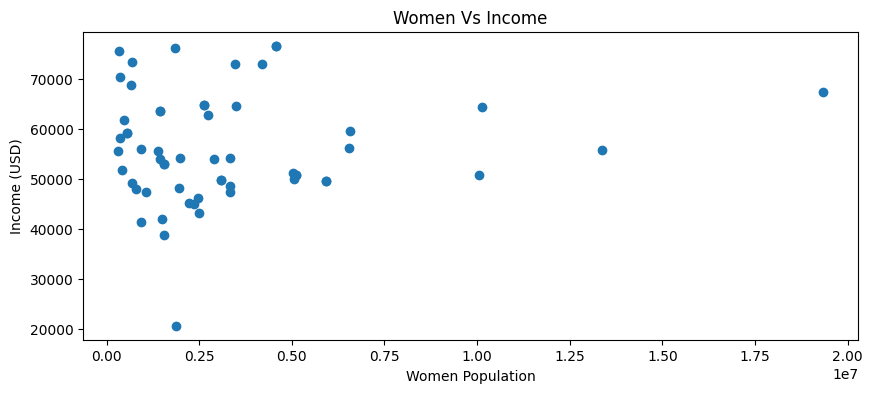

In [17]:
plt.figure(figsize=(10,4))

plt.scatter(us_census.women, us_census.income)
plt.title('Women Vs Income')
plt.xlabel('Women Population')
plt.ylabel('Income (USD)')
plt.show()

In [18]:
us_census = us_census.drop('genderpop', axis=1)

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [19]:
us_census.women.isna().any()

np.True_

In [20]:
us_census.women = us_census.women.fillna(us_census.totalpop - us_census.men)
us_census.women.isna().any()

np.False_

10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [21]:
us_census.duplicated().any()

np.False_

11. Drop those duplicates using the `.drop_duplicates()` function.

In [22]:
us_census = us_census.drop_duplicates(subset='state')

In [23]:
us_census.shape

(51, 12)

12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

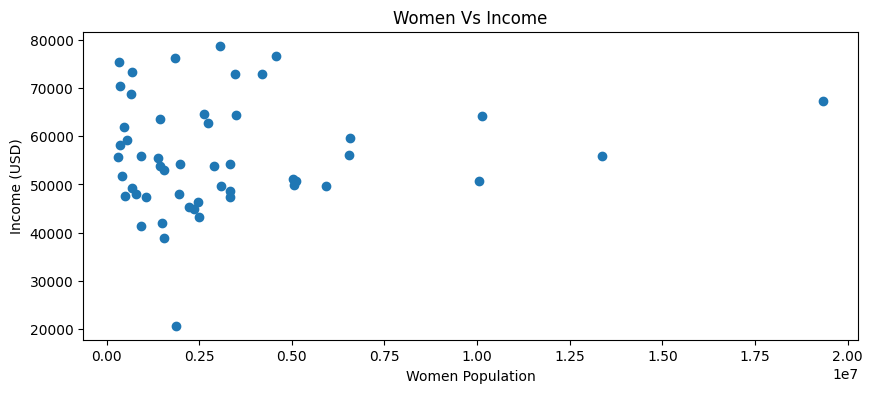

In [24]:
plt.figure(figsize=(10,4))

plt.scatter(us_census.women, us_census.income)
plt.title('Women Vs Income')
plt.xlabel('Women Population')
plt.ylabel('Income (USD)')
plt.show()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [25]:
us_census.head()

,unnamed: 0,state,totalpop,hispanic,white,black,native,asian,pacific,income,men,women
0,0,Iowa,3093526,5.30%,87.72%,3.26%,0.29%,1.70%,0.06%,53017.75,1534595,1558931.0
1,1,Kansas,2892987,11.64%,75.96%,6.57%,0.73%,2.33%,NaN,53885.61,1439862,1453125.0
2,2,Kentucky,4397353,3.22%,85.23%,8.27%,0.17%,1.13%,0.05%,45285.80,2164208,2233145.0
3,3,Louisiana,4625253,4.87%,54.98%,36.33%,0.48%,1.67%,0.04%,44957.99,2261156,2364097.0
4,4,Maine,1329100,1.43%,93.71%,1.13%,0.79%,0.97%,0.02%,49181.97,650081,679019.0


In [26]:
race_categories = list(us_census.columns)[3:9]
print(race_categories)

['hispanic', 'white', 'black', 'native', 'asian', 'pacific']


14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

In [27]:
us_census[race_categories].isna().any()

hispanic    False
white       False
black       False
native      False
asian       False
pacific      True
dtype: bool

In [28]:
for i in race_categories:
    us_census[i] = us_census[i].str.strip('%')
    us_census[i] = pd.to_numeric(us_census[i])    

In [29]:
us_census.pacific = us_census.pacific.fillna(100 - us_census[race_categories].sum(axis=1))

In [30]:
us_census[race_categories].isna().any()

hispanic    False
white       False
black       False
native      False
asian       False
pacific     False
dtype: bool

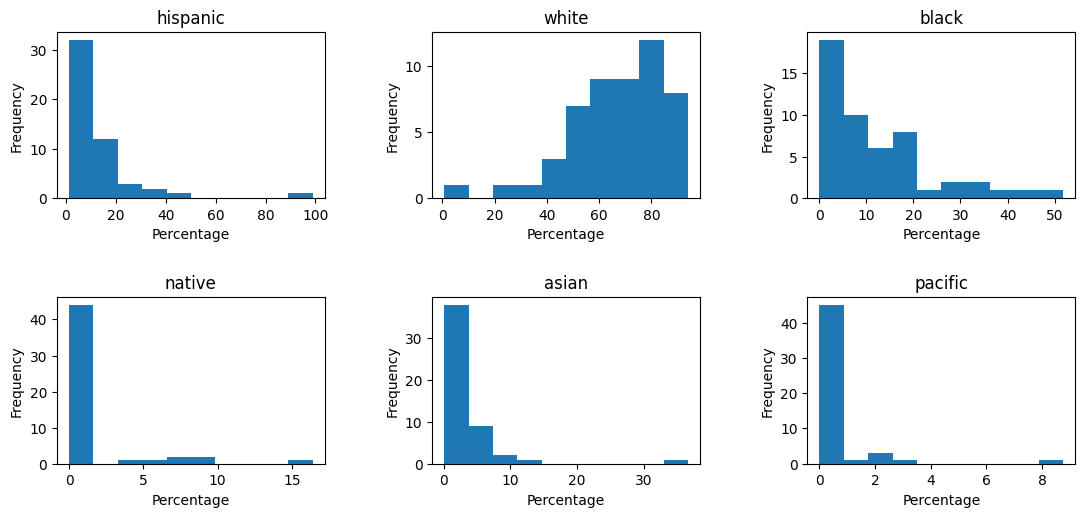

<Figure size 640x480 with 0 Axes>

In [31]:

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
fig.tight_layout(pad=5.0)  # Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

for i, race in enumerate(race_categories):
    ax1 = axes[i // 3, i % 3]  # Locating the subplot 
    ax1.hist(us_census[race])
    ax1.set_title(race)
    ax1.set_xlabel("Percentage")
    ax1.set_ylabel("Frequency")
    
plt.show()
plt.clf()

## Get Creative

15. Phew. You've definitely impressed your boss on your first day of work.

    But is there a way you really convey the power of pandas and Python over the drudgery of `csv` and Excel?
    
    Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you've been searching for.

 #### Mean Income per State

In [35]:
us_census_sorted = us_census.sort_values('income', ascending=False)  

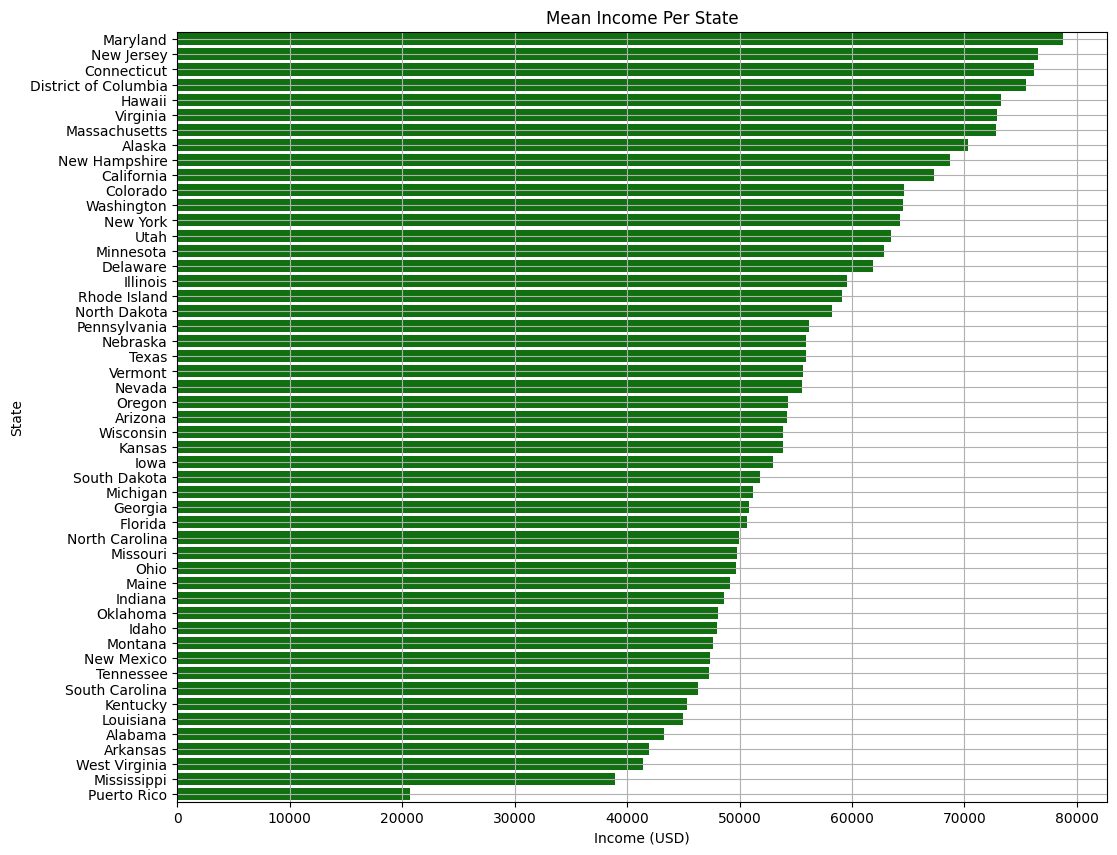

In [36]:
plt.figure(figsize=(12,10))
sns.barplot(y=us_census_sorted.state, x=us_census_sorted.income, color='green')
plt.xlabel('Income (USD)')
plt.ylabel('State')
plt.title('Mean Income Per State')
plt.grid()
plt.show()

#### Looking for Correlation Between Variables

In [37]:
census_forcorr = us_census[['hispanic', 'white', 'black', 'native', 'asian', 'pacific', 'income', 'men', 'women']]
corr_matrix = census_forcorr.corr()

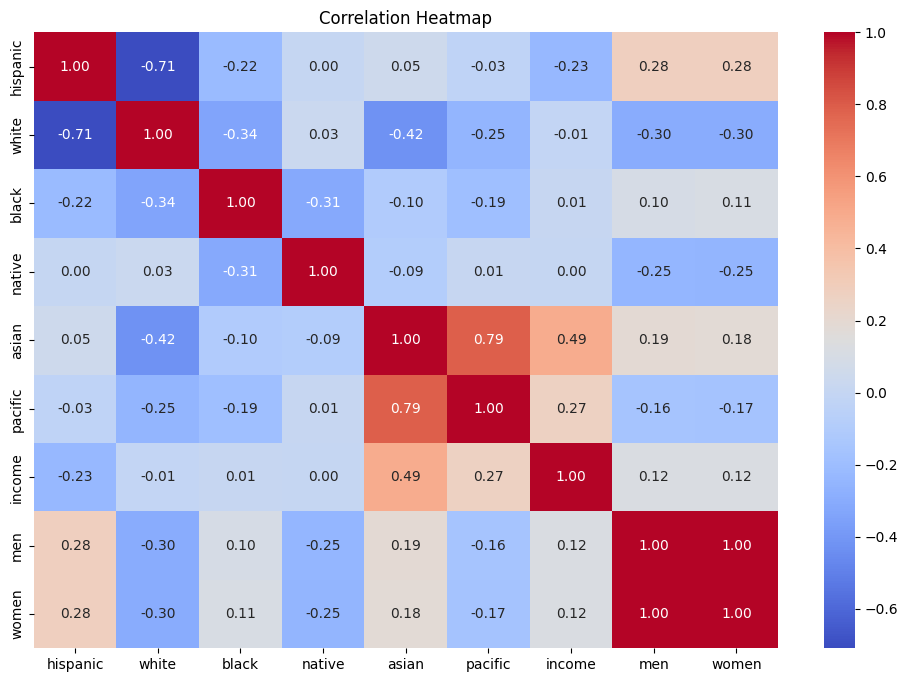

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Based on the correlation matrix, we can identify several noteworthy correlations (those with an absolute value greater than 0.4). Below is an analysis of the most significant correlations:

### Notable Positive Correlations

1. **`asian` and `pacific` (0.789)**
   - **Interpretation:** There is a strong positive correlation between the Asian and Pacific populations. This suggests that in states with a high proportion of Asian population, there also tends to be a high proportion of Pacific population. This could reflect similar migration or settlement patterns between these two ethnic groups.

2. **`asian` and `income` (0.490)**
   - **Interpretation:** There is a moderate positive correlation between the proportion of Asian population and average income. This might suggest that states with a higher proportion of Asians tend to have higher incomes, potentially reflecting socioeconomic factors associated with this population.

### Notable Negative Correlations

1. **`hispanic` and `white` (-0.709)**
   - **Interpretation:** There is a strong negative correlation between the proportions of Hispanic and White populations. This indicates that in states with a high proportion of Hispanic population, the proportion of White population tends to be low and vice versa. This could reflect demographic differences or migration patterns in different states.

2. **`asian` and `white` (-0.425)**
   - **Interpretation:** There is a moderate negative correlation between the proportions of Asian and White populations. This suggests that in states with a higher proportion of Asians, the proportion of Whites tends to be lower, which could indicate areas with greater ethnic diversity.